In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.precision', 18)
np.set_printoptions(precision=18)

In [2]:
def upload_df(file_path, start_basis_size = 900):
  df = pd.read_csv(file_path)
  df['Basis Size'] = df['Basis Size'].astype(int)

  for i in range(df['Basis Size'].values[0],start_basis_size + 1,100):
    df.drop(df[df['Basis Size'] == i].index, inplace = True)

  return df

In [3]:
def upload_df1(file_path):
  df = pd.read_csv(file_path)
  df['basis size'] = df['basis size'].astype(int)

  return df[2:]

In [4]:

def graph(df: pd.DataFrame, n_cols: int = 4):
    """
    Generates and displays a grid of plots for each feature in a DataFrame
    against the 'basis size' column.

    Args:
        df (pd.DataFrame): The input DataFrame. It must contain a column
                           named 'basis size' (case-insensitive).
        n_cols (int): The number of columns to use in the plot grid.
                      Defaults to 4.
    """
    # Create a copy to avoid changing the original DataFrame
    df_plot = df.copy()

    # Standardize column names to lowercase for consistency
    df_plot.columns = [col.lower() for col in df_plot.columns]

    # Check for the required 'basis size' column
    if 'basis size' not in df_plot.columns:
        raise ValueError("Input DataFrame must contain a 'basis size' column.")

    # Prepare the data and identify features to plot
    df_plot['basis size'] = df_plot['basis size'].astype(int)
    features = sorted([col for col in df_plot.columns if col != 'basis size'])
    n_features = len(features)

    # Handle the case of no features to plot
    if n_features == 0:
        print("No feature columns found to plot.")
        return

    # Calculate the required number of rows for the grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create the figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows), sharex=True)
    fig.suptitle('Features vs. Basis Size', fontsize=16, y=1.03)

    # Flatten the axes array for easy, single-loop iteration
    axes = axes.flatten()

    # Plot each feature against the basis size
    for i, feature in enumerate(features):
        ax = axes[i]
        ax.scatter(df_plot['basis size'], df_plot[feature], marker='o')

        # Format titles and labels for readability
        ax.set_title(feature.replace('_', ' ').title())
        ax.set_xlabel('Basis Size')
        ax.set_ylabel('Value')
        ax.grid(True, linestyle='--', alpha=0.6)

    # Clean up by removing any empty, unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent plot elements from overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

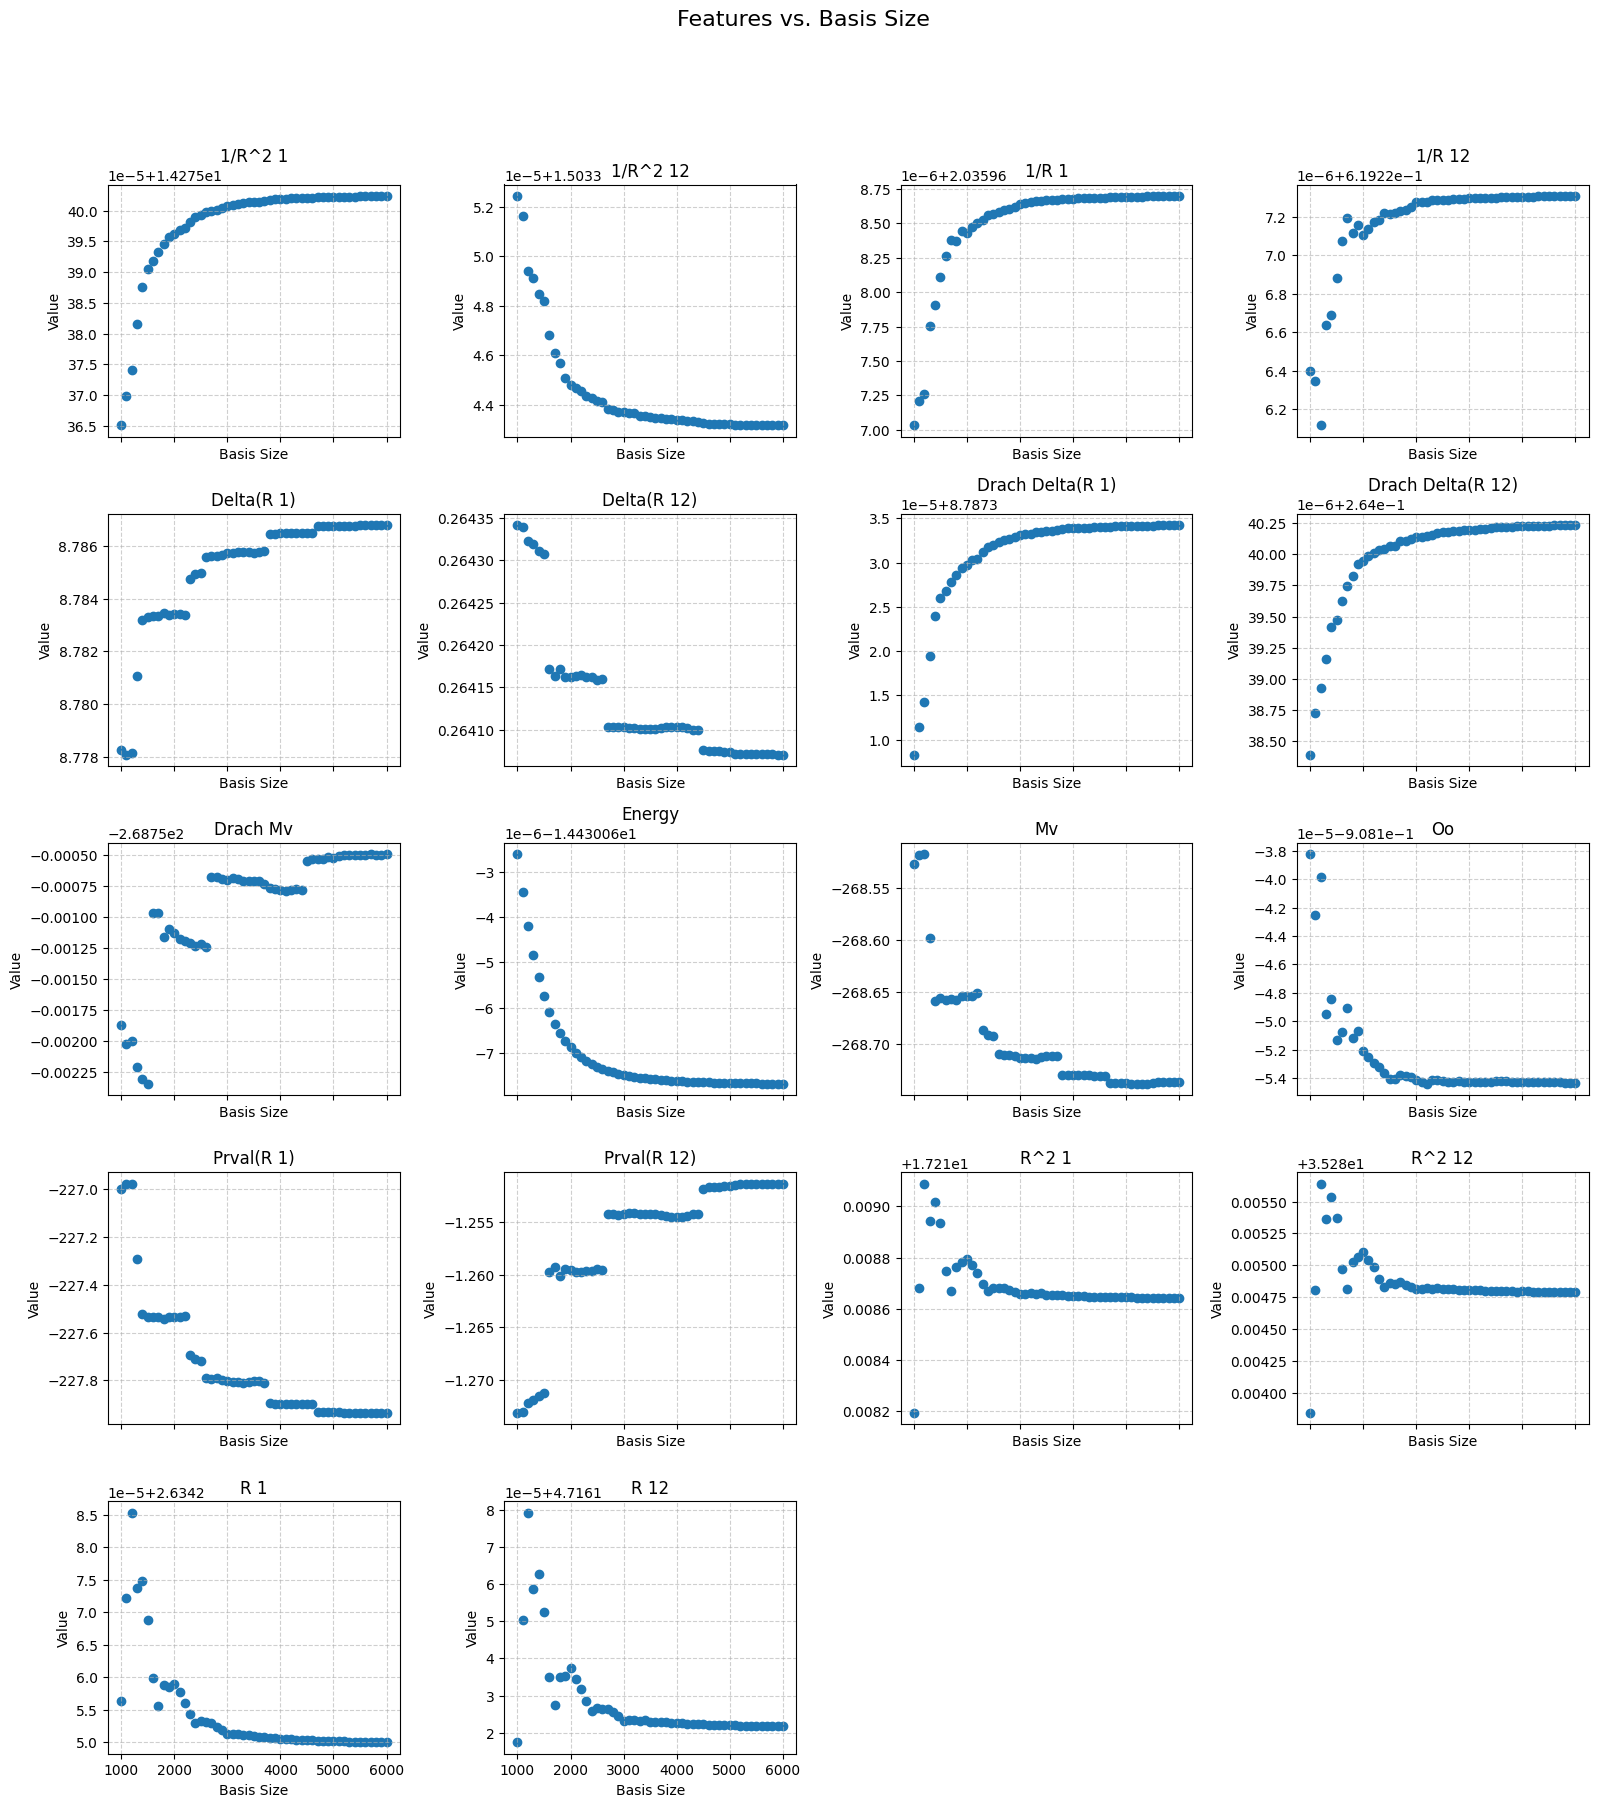

In [71]:
graph(be_3se_init)

In [5]:
li_2se = upload_df('/home/trulyaldi/extrapolation/large-dataset/Li_2Se.csv')
li_2se = li_2se.drop(columns = ['SO1', 'SO2'])
li_2se = li_2se.rename(columns= {'Basis Size': 'basis size'})


In [6]:
li_2se_inf = li_2se.loc[li_2se['basis size'] == max(li_2se['basis size'])]
li_2se_init = li_2se.iloc[:-1]

In [8]:

be_1se = upload_df('/home/trulyaldi/extrapolation/large-dataset/Be_1Se.csv')
be_1se = be_1se.drop(columns = ['SO1', 'SO2'])
be_1se = be_1se.rename(columns= {'Basis Size': 'basis size'})
be_1se_inf = be_1se.loc[be_1se['basis size'] == max(be_1se['basis size'])]
be_1se_init = be_1se.iloc[:-1]

In [9]:


be_3po = upload_df('/home/trulyaldi/extrapolation/large-dataset/Be_3Po.csv')
be_3po = be_3po.drop(columns = ['SO1', 'SO2'])
be_3po = be_3po.rename(columns= {'Basis Size': 'basis size'})
be_3po_inf = be_3po.loc[be_3po['basis size'] == max(be_3po['basis size'])]
be_3po_init = be_3po.iloc[:-1]

In [10]:
be_1po = upload_df('/home/trulyaldi/extrapolation/large-dataset/Be_1Po.csv')
be_1po = be_1po.drop(columns = ['SO1', 'SO2'])
be_1po = be_1po.rename(columns= {'Basis Size': 'basis size'})
be_1po_inf = be_1po.loc[be_1po['basis size'] == max(be_1po['basis size'])]
be_1po_init = be_1po.iloc[:-1]

In [11]:
li_2po = upload_df('/home/trulyaldi/extrapolation/large-dataset/Li_2Po.csv')
li_2po = li_2po.drop(columns = ['SO1', 'SO2'])
li_2po = li_2po.rename(columns= {'Basis Size': 'basis size'})
li_2po_inf = li_2po.loc[li_2po['basis size'] == max(li_2po['basis size'])]
li_2po_init = li_2po.iloc[:-1]

In [12]:
be_3se = upload_df('/home/trulyaldi/extrapolation/large-dataset/Be_3Se.csv')
be_3se = be_3se.drop(columns = ['SO1', 'SO2'])
be_3se = be_3se.rename(columns= {'Basis Size': 'basis size'})
be_3se_inf = be_3se.loc[be_3se['basis size'] == max(be_3se['basis size'])]
be_3se_init = be_3se.iloc[:-1]

In [13]:
be_4pe = upload_df1('/home/trulyaldi/extrapolation/small-dataset/B_4Pe-01 dataframe.csv')

In [43]:
import importlib, extrapolator
importlib.reload(extrapolator)


<module 'extrapolator' from '/home/trulyaldi/extrapolation/src/extrapolator.py'>

In [93]:
be_1po_inf

,basis size,Energy,MV,drach_MV,OO,1/r^2_1,1/r^2_12,1/r_1,1/r_12,r_1,r_12,r^2_1,r^2_12,delta(r_1),delta(r_12),drach_delta(r_1),drach_delta(r_12),prval(r_1),prval(r_12)
60,16400,-14.473451386869200519,-266.659088807117996112,-266.664462793425002474,-0.812091476559140046,14.216540761971700135,1.542483736797960026,2.069169995852650157,0.693302859821317008,1.775871778505659915,2.976600188092250132,6.517748468239560111,12.922195769590199887,8.724265747607580224,0.261343940528712015,8.724481440729169535,0.261324032380949978,-226.280220458874993028,-1.185257894829250036


Available columns to analyze:
- Energy
- MV
- drach_MV
- OO
- 1/r^2_1
- 1/r^2_12
- 1/r_1
- 1/r_12
- r_1
- r_12
- r^2_1
- r^2_12
- delta(r_1)
- delta(r_12)
- drach_delta(r_1)
- drach_delta(r_12)
- prval(r_1)
- prval(r_12)
------------------------------

--- Fitting Exponential Model ---
Optimizing Exponential weights using known value: -14.47345139
  Best weight power: 1 with distance 1.24e-07

--- Fitting Exponential SQ Model ---
Optimizing Exponential SQ weights using known value: -14.47345139
  Best weight power: 1 with distance 5.03e-08

--- Fitting Power Law Model ---
Optimizing Power Law weights using known value: -14.47345139
  Best weight power: 1 with distance 8.36e-08

FINAL RESULTS FOR 'Energy'

Exponential Model:
  Extrapolated Limit (C): -14.473451262866948497
  Total Uncertainty:      ± 0.000000000000000000
  Difference from known:  0.000000124002252022

Exponential √x Model:
  Extrapolated Limit (C): -14.473451437211075188
  Total Uncertainty:      ± 0.000000000000000000


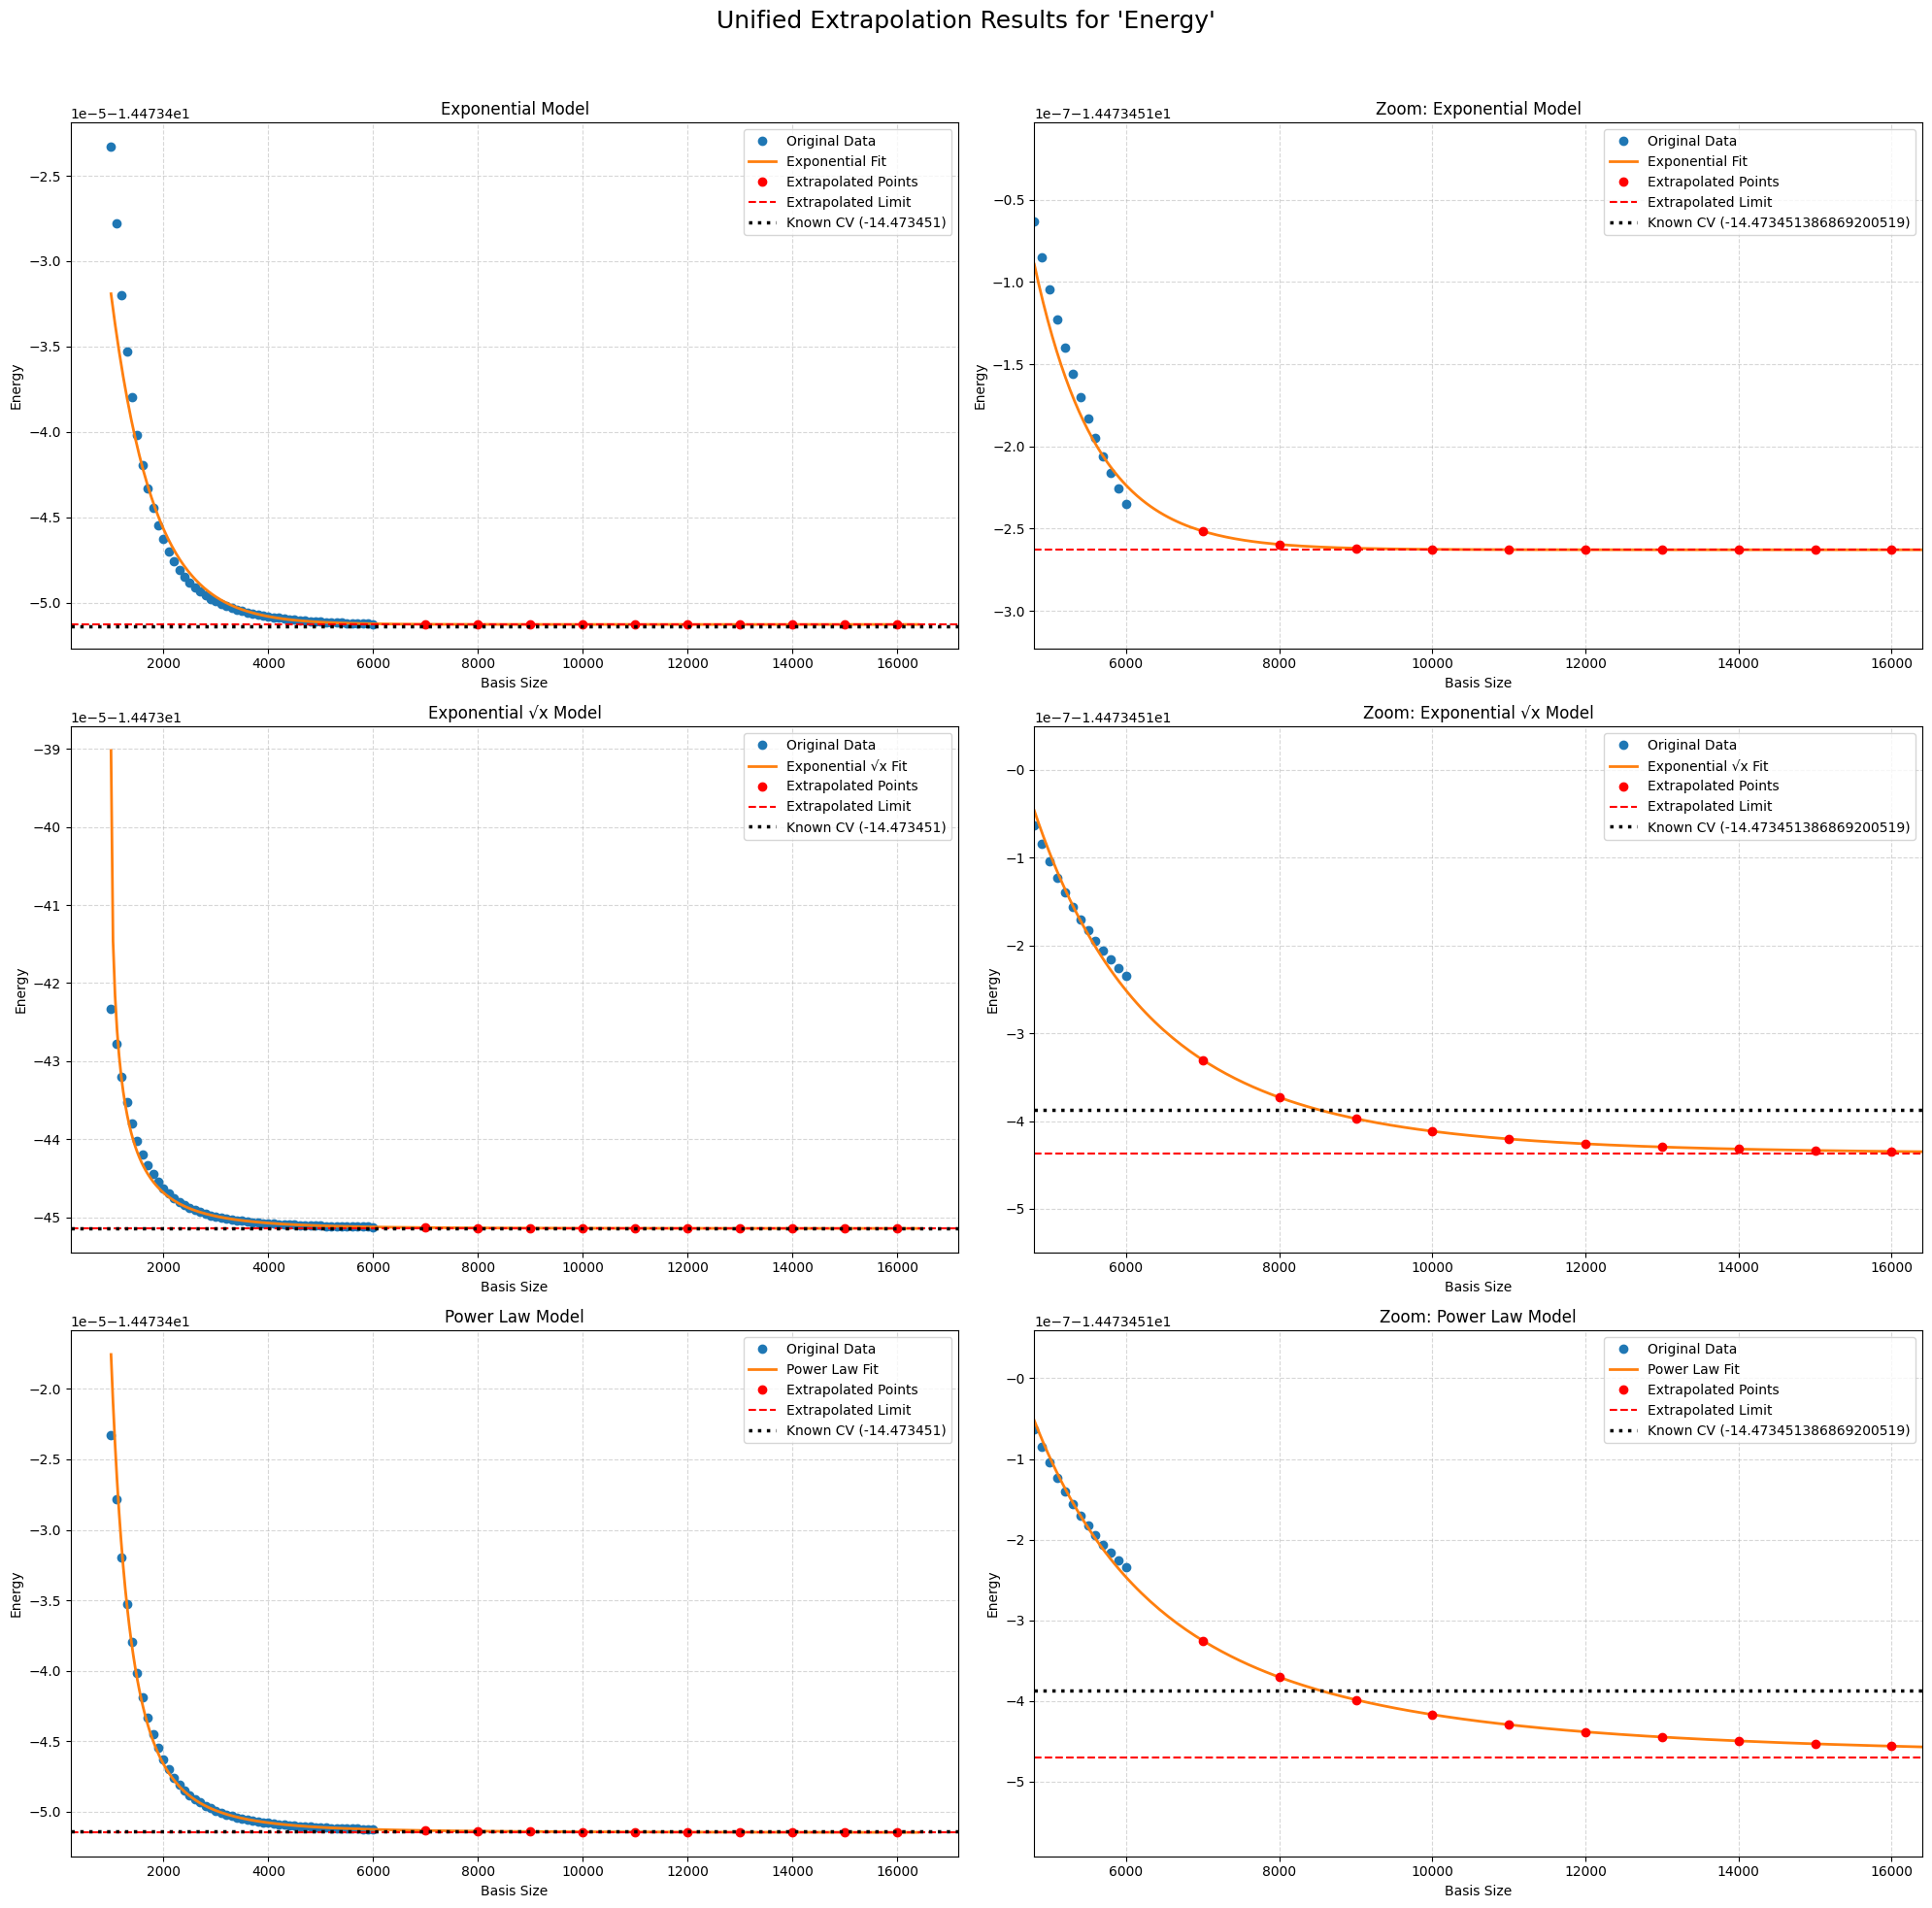

In [111]:
extrapolator.unified_extrapolator(be_1po_init).fit()

In [104]:
reference_values = pd.read_csv('/home/trulyaldi/extrapolation/large-dataset/reference_vals.txt', delim_whitespace=True)

/tmp/ipykernel_1404/4191850560.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  reference_values = pd.read_csv('/home/trulyaldi/extrapolation/large-dataset/reference_vals.txt', delim_whitespace=True)


In [73]:
reference_values['system'].unique()

array(['infBe_1Po-01', 'infBe_1Se-01', 'infBe_3Po-01', 'infBe_3Se-01',
       'infLi_2Po-01', 'infLi_2Se-01'], dtype=object)

In [100]:
class SystemExtrapolator:
    """
    Given one system's dataframe with 'basis size' and multiple expectation value columns,
    extrapolate each column to infinity using unified_extrapolator and return a new dataframe
    with *_exp_inf, *_exp_sq_inf, *_power_inf columns.
    """

    def __init__(self, df):
        if "basis size" not in df.columns:
            raise ValueError("DataFrame must contain 'basis size'.")
        self.df = df.copy()

    def extrapolate_all(self):
        """
        Extrapolate all expectation columns (all except 'basis size').
        Returns a dataframe with new *_inf columns.
        """
        result_df = self.df.copy()

        expectation_columns = [c for c in self.df.columns if c != "basis size"]

        for col in expectation_columns:
            extrap = extrapolator.unified_extrapolator(self.df)
            extrap.fit_column(col, self.df["basis size"].max())

            # Extract extrapolated infinity values (C parameters)
            exp_inf = extrap.results['exponential'].params['C'].value
            exp_sq_inf = extrap.results['exponential_sq'].params['C'].value
            power_inf = extrap.results['power'].params['C'].value

            # Add them as constant columns
            result_df[f"{col}_exp_inf"] = exp_inf
            result_df[f"{col}_exp_sq_inf"] = exp_sq_inf
            result_df[f"{col}_power_inf"] = power_inf

        return result_df


In [105]:
def extrapolate_system(df, system_name):
    """
    Extrapolate all expectation values for one system dataframe.
    Returns a dataframe with expectation_value + extrapolated values.
    """
    extr = SystemExtrapolator(df)
    res = extr.extrapolate_all()

    rows = []
    for col in df.columns:
        if col == "basis size":
            continue
        rows.append({
            "system": system_name,
            "expectation_value": col,
            "exp_inf": res[f"{col}_exp_inf"].iloc[0],
            "exp_sq_inf": res[f"{col}_exp_sq_inf"].iloc[0],
            "power_inf": res[f"{col}_power_inf"].iloc[0],
        })
    return pd.DataFrame(rows)


# --- Extrapolate all 6 systems ---
systems = {
    "infBe_1Po-01": be_1po,
    "infBe_1Se-01": be_1se,
    "infBe_3Po-01": be_3po,
    "infBe_3Se-01": be_3se,
    "infLi_2Po-01": li_2po,
    "infLi_2Se-01": li_2se,
}

all_results = []
for sys_name, df in systems.items():
    all_results.append(extrapolate_system(df, sys_name))

extrapolated_df = pd.concat(all_results, ignore_index=True)

# --- Merge with your reference_values on system + expectation_value ---
reference_values = reference_values.merge(
    extrapolated_df,
    on=["system", "expectation_value"],
    how="left"
)



--- Fitting Exponential Model ---
  No known convergent value provided, using weight power n=1 for Exponential

--- Fitting Exponential SQ Model ---
  No known convergent value provided, using weight power n=1 for Exponential SQ

--- Fitting Power Law Model ---
  No known convergent value provided, using weight power n=1 for Power Law

FINAL RESULTS FOR 'Energy'

Exponential Model:
  Extrapolated Limit (C): -14.473451386868132928
  Total Uncertainty:      ± 0.000000000000000000

Exponential √x Model:
  Extrapolated Limit (C): -14.473451388429486641
  Total Uncertainty:      ± 0.000000000000000000

Power Law Model:
  Extrapolated Limit (C): -14.473451395623190052
  Total Uncertainty:      ± 0.000000000000000000

--- Fitting Exponential Model ---
  No known convergent value provided, using weight power n=1 for Exponential

--- Fitting Exponential SQ Model ---
  No known convergent value provided, using weight power n=1 for Exponential SQ

--- Fitting Power Law Model ---
  No known conve

/home/trulyaldi/extrapolation/src/extrapolator.py:77: RuntimeWarning: overflow encountered in exp
  W_pos = np.exp(params['B'].value * x_scaled)
/home/trulyaldi/extrapolation/src/extrapolator.py:81: RuntimeWarning: invalid value encountered in divide
  W_pos /= np.mean(W_pos)



--- Fitting Exponential SQ Model ---
Removed 3 early outlier(s) for 'r^2_1'
  No known convergent value provided, using weight power n=1 for Exponential SQ

--- Fitting Power Law Model ---
Removed 3 early outlier(s) for 'r^2_1'
  No known convergent value provided, using weight power n=1 for Power Law

FINAL RESULTS FOR 'r^2_1'

Exponential Model:
  Extrapolated Limit (C): 4.555611395755974513
  Total Uncertainty:      ± 0.000000000000000000

Exponential √x Model:
  Extrapolated Limit (C): 4.555611411682805922
  Total Uncertainty:      ± 0.000000000000000000

Power Law Model:
  Extrapolated Limit (C): 4.555611446977121837
  Total Uncertainty:      ± 0.000000000000000000

--- Fitting Exponential Model ---
Removed 3 early outlier(s) for 'r^2_12'
  No known convergent value provided, using weight power n=1 for Exponential

--- Fitting Exponential SQ Model ---
Removed 3 early outlier(s) for 'r^2_12'
  No known convergent value provided, using weight power n=1 for Exponential SQ

--- Fitti

/home/trulyaldi/extrapolation/src/extrapolator.py:77: RuntimeWarning: overflow encountered in exp
  W_pos = np.exp(params['B'].value * x_scaled)
/home/trulyaldi/extrapolation/src/extrapolator.py:81: RuntimeWarning: invalid value encountered in divide
  W_pos /= np.mean(W_pos)



--- Fitting Exponential SQ Model ---
Removed 1 early outlier(s) for 'r^2_12'
  No known convergent value provided, using weight power n=1 for Exponential SQ

--- Fitting Power Law Model ---
Removed 1 early outlier(s) for 'r^2_12'
  No known convergent value provided, using weight power n=1 for Power Law

FINAL RESULTS FOR 'r^2_12'

Exponential Model:
  Extrapolated Limit (C): 18.683158005233899246
  Total Uncertainty:      ± 0.000000000000000000

Exponential √x Model:
  Extrapolated Limit (C): 18.683158005233348575
  Total Uncertainty:      ± 0.000000000000000000

Power Law Model:
  Extrapolated Limit (C): 18.683157665626268340
  Total Uncertainty:      ± 0.000000000000000000

--- Fitting Exponential Model ---
Removed 3 early outlier(s) for 'delta(r_1)'
  No known convergent value provided, using weight power n=1 for Exponential

--- Fitting Exponential SQ Model ---
Removed 3 early outlier(s) for 'delta(r_1)'
  No known convergent value provided, using weight power n=1 for Exponential

In [106]:
reference_values = reference_values.fillna(0)


In [113]:
reference_values['exp_inf'].values[0] - reference_values['ref_value'].values[0]

np.float64(1.0658141036401503e-12)